In [40]:
import numpy as np
import matplotlib.pyplot as plt


In [41]:
import csv
times = []
counts = []
meanCurrent = []
with open('OctopoleFillingData_10_04_24(Sheet1).csv', mode ='r')as file:
  csvFile = csv.reader(file,delimiter = ';')
  next(csvFile)
  for lines in csvFile:
        times.append(float(lines[0]))
        counts.append(float(lines[1]))
        meanCurrent.append(0.5*(float(lines[3])+float(lines[4])))
file.close()

[1.         1.         0.5        0.6        1.         1.
 1.         1.         1.         1.         1.         0.96
 0.92307692 0.92307692 0.96       1.         1.         0.92307692
 0.82758621 0.82758621 0.85714286 0.8        0.88888889 1.
 1.         1.         1.         1.         0.96       0.92307692
 0.96       1.         0.96       1.         0.96      ]
300.0


Text(0.5, 0.98, 'Counts per time, with times adjusted for mean DC current, relative to first measurement (300c/s)')

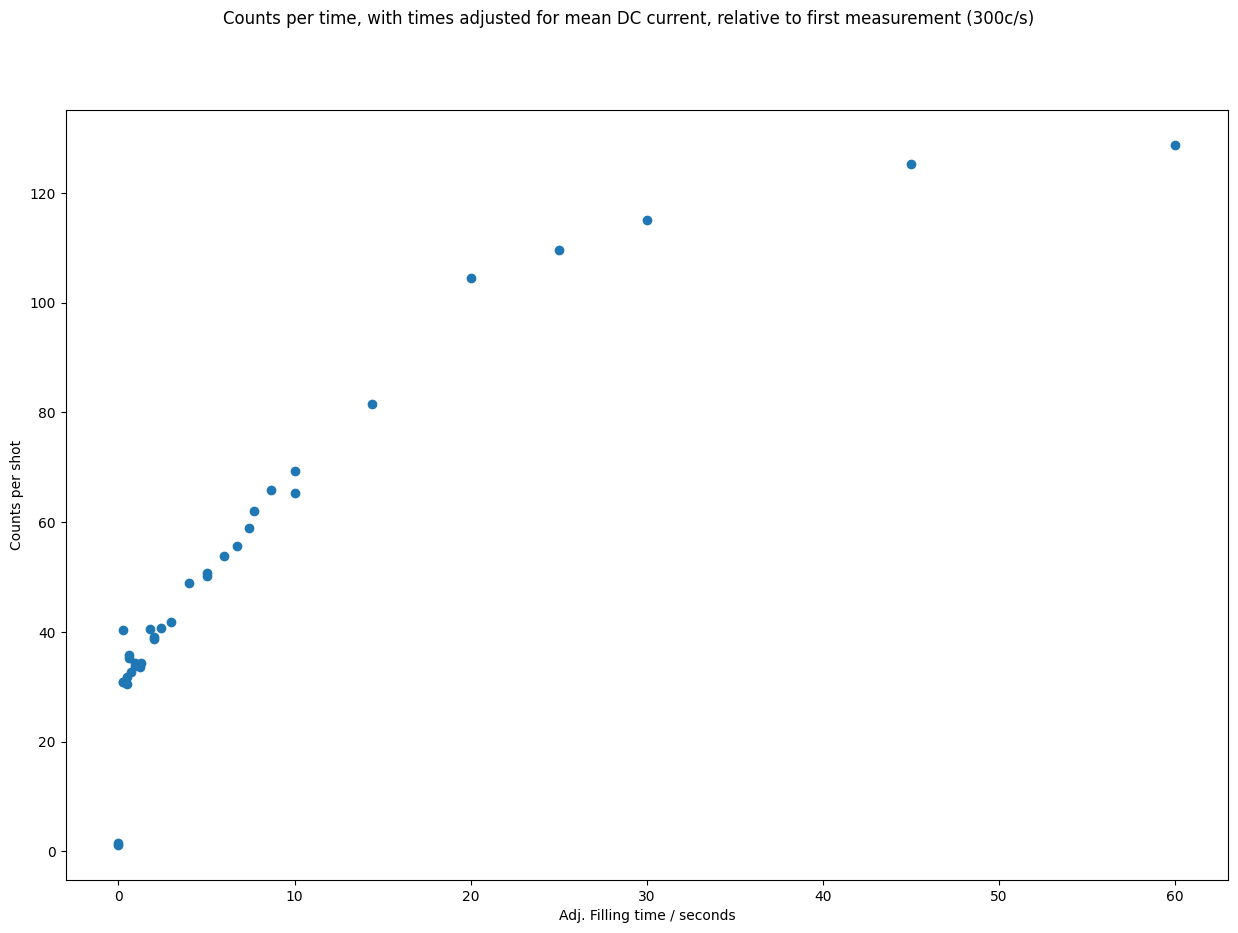

In [42]:
fig,ax = plt.subplots(figsize = (15,10))
adjustmentFactor = meanCurrent[0]/(np.array(meanCurrent))
ax.scatter(times*adjustmentFactor,np.array(counts)/20)
# ax.errorbar(times*adjustmentFactor,np.array(counts)/20*adjustmentFactor,np.sqrt(counts)*adjustmentFactor/20,ls = '')
print(adjustmentFactor)
print(meanCurrent[0])
ax.set_xlabel('Adj. Filling time / seconds')
ax.set_ylabel('Counts per shot')
fig.suptitle('Counts per time, with times adjusted for mean DC current, relative to first measurement (300c/s)')

Let's load in the older data as well.

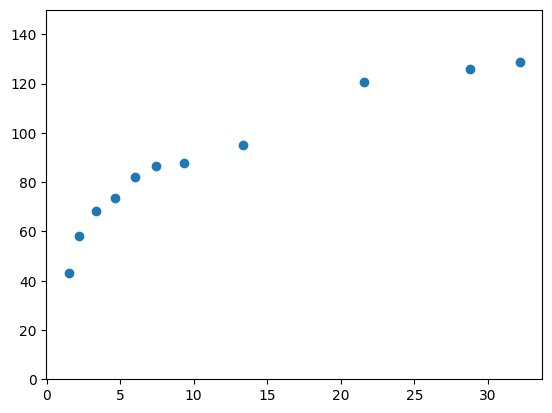

In [43]:
times2  =[]
counts2 = []
meanCurrent2 = []


with open('OctopoleFillingData_21_03_24.csv', mode ='r')as file:
  csvFile2 = csv.reader(file,delimiter = ';')
  next(csvFile2)
  for lines in csvFile2:
        times2.append(float(lines[0]))
        counts2.append(float(lines[1]))
        meanCurrent2.append(0.5*(float(lines[2])+float(lines[3])))
adj = np.max(counts2)/np.max(counts)
fig,ax = plt.subplots()
ax.set_ylim(0,150)
ax.scatter(np.array(times2)*1.5*meanCurrent2[0]/np.array(meanCurrent2),np.array(counts2)/20/adj)

Text(0, 0.5, 'Counts per shot (adjusted so graphs have same scale)')

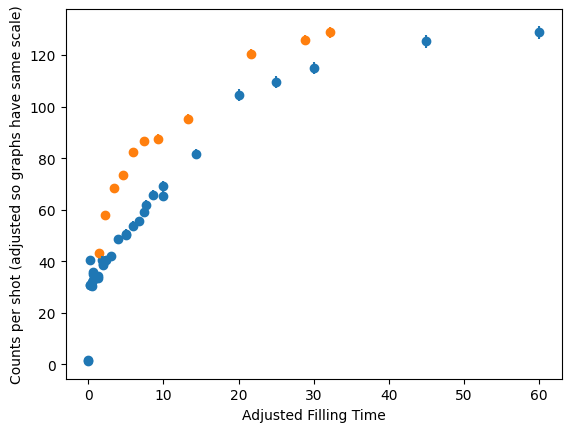

In [49]:
fig,ax = plt.subplots()

ax.scatter(times*adjustmentFactor,np.array(counts)/20)
ax.scatter(np.array(times2)*1.5*meanCurrent2[0]/np.array(meanCurrent2),np.array(counts2)/20/adj)

ax.errorbar(times*adjustmentFactor,np.array(counts)/20,np.sqrt(counts)/20,ls = '')
ax.errorbar(np.array(times2)*1.5*meanCurrent2[0]/np.array(meanCurrent2),np.array(counts2)/20/adj,np.sqrt(counts2)/20/adj,ls = '')

ax.set_xlabel('Adjusted Filling Time')
ax.set_ylabel('Counts per shot (adjusted so graphs have same scale)')